In [28]:
from chxanalys.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
import pickle as cpk
from chxanalys.chx_xpcs_xsvs_jupyter_V1 import *

from eiger_io.pims_reader import EigerImages

In [2]:
CYCLE= '2017_2'  #change clycle here
username =  getpass.getuser()
 
 
data_dir0  = create_user_folder(CYCLE, username)
print( data_dir0 )

Results from this analysis will be stashed in the directory /XF11ID/analysis/2017_2/yuzhang/Results/
/XF11ID/analysis/2017_2/yuzhang/Results/


In [13]:
data_dir = os.path.join(data_dir0, 'Yang_Pressure/')
os.makedirs(data_dir, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % data_dir)

Results from this analysis will be stashed in the directory /XF11ID/analysis/2017_2/yuzhang/Results/Yang_Pressure/


In [14]:
uid = '748501' #(scan num: 3203) (Measurement: XPCS -1.8K frames, 1 Hz: Bi2212, Pressure 1GPa )


In [15]:
md = get_meta_data( uid )
imgs = load_data( uid, md['detector'], reverse= True  )
md.update( imgs.md );Nimg = len(imgs);
#if 'number of images'  not in list(md.keys()):
md['number of images']  = Nimg
pixel_mask =  1- np.int_( np.array( imgs.md['pixel_mask'], dtype= bool)  )
print( 'The data are: %s' %imgs )

md['acquire period' ] = md['cam_acquire_period']
md['exposure time'] =  md['cam_acquire_time']

The data are: Sliced and/or processed EigerImages2. Original repr:
    <Frames>
    Length: 1800 frames
    Frame Shape: 2167 x 2070
    Pixel Datatype: uint32


In [16]:
center = [   md['beam_center_x'], 2167 - md['beam_center_y']]  # center of the speckle pattern, read from [image_x, image_y], ((not python y,x))
#Or change to something else:
#center = [  x, y ]
center=[center[0], center[1]]
inc_x0 =  center[1]
inc_y0=   center[0]

uidstr = 'uid=xxx' 

dpix, lambda_, Ldet,  exposuretime, timeperframe, center = check_lost_metadata(
    md, Nimg, inc_x0 = inc_x0, inc_y0=   inc_y0, pixelsize = 7.5*10*(-5) )

timeperframe = md['acquire period' ]

setup_pargs=dict(uid=uidstr, dpix= dpix, Ldet=Ldet, lambda_= lambda_, exposuretime=exposuretime,
        timeperframe=timeperframe, center=center, path= data_dir)

print_dict( setup_pargs )


uid--> uid=xxx
Ldet--> 4917.50495
exposuretime--> 0.99999
lambda_--> 1.28454
dpix--> 0.0750000035623
center--> [988, 1120]
timeperframe--> 1.0
path--> /XF11ID/analysis/2017_2/yuzhang/Results/Yang_Pressure/


In [17]:
mask_path = '/XF11ID/analysis/2017_2/masks/'
# mask_name = 'July18_mask.npy' #smaller than 160 C use this one
mask_name = 'Jul5_SAXS.npy' #>= 160 C use this one

<IPython.core.display.Javascript object>


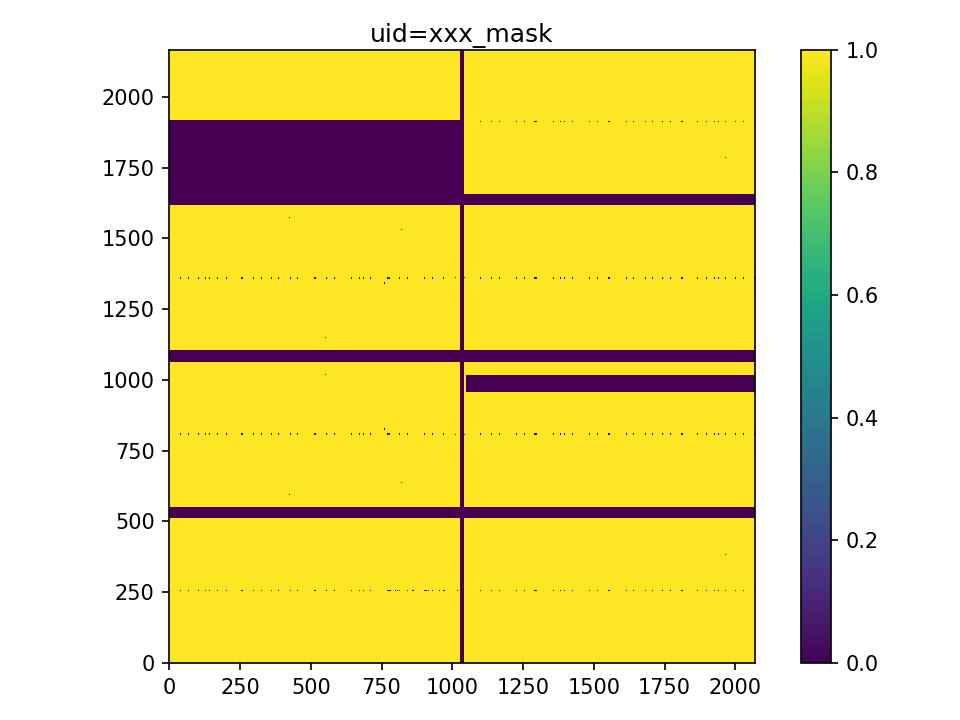

In [18]:
mask = load_mask(mask_path, mask_name, plot_ =  False, image_name = uidstr + '_mask', reverse= True ) 
mask *= pixel_mask
show_img(mask,image_name = uidstr + '_mask', save=True, path=data_dir, aspect=1)


In [ ]:
p=1.47 GPa

uid=1afc83
uid=1393d2 (center)
uid= 48e966

p= 2.53 GPa P'=3.0 GPa
1 ['171cf5'] (scan num: 3160) (Measurement: XPCS -1.8K frames, 1 Hz: Bi2212, Pressure 1GPa ) (center)
 1 ['171cf5'] (scan num: 3160) (Measurement: XPCS -1.8K frames, 1 Hz: Bi2212, Pressure 1GPa ) (30 micron away)

P= 3.3 GPa
1 ['178f11'] (scan num: 3169) (Measurement: XPCS -1.8K frames, 1 Hz: Bi2212, Pressure 1GPa ) (center)
1 ['e4ada9'] (scan num: 3170) (Measurement: XPCS -1.8K frames, 1 Hz: Bi2212, Pressure 1GPa ) (30 micron away)

P=3.94 GPa 4.5 GPa
1 ['9b08ff'] (scan num: 3180) (Measurement: XPCS -1.8K frames, 1 Hz: Bi2212, Pressure 1GPa ) (center)
1 ['9bea6f'] (scan num: 3181) (Measurement: XPCS -1.8K frames, 1 Hz: Bi2212, Pressure 1GPa ) (30 micron-away)

P=5.08 GPa (5.38 GPa)
1 ['293961'] (scan num: 3194) (Measurement: XPCS -1.8K frames, 1 Hz: Bi2212, Pressure 1GPa ) (center)
 1 ['af5b4a'] (scan num: 3195) (Measurement: XPCS -1.8K frames, 1 Hz: Bi2212, Pressure 1GPa ) (30 microns away)

p=6.27 GPa
1 ['398940'] (scan num: 3202) (Measurement: XPCS -1.8K frames, 1 Hz: Bi2212, Pressure 1GPa ) (center)
1 ['748501'] (scan num: 3203) (Measurement: XPCS -1.8K frames, 1 Hz: Bi2212, Pressure 1GPa ) (50 microns away) (unprocessed)


In [104]:
uids = { 'p=1.47': [ '1afc83', '1393d2', '48e966'],
        'p=2.53':  [ '171cf5', ],
        'p=3.30': ['178f11', 'e4ada9'],     
        'p=3.94': ['9b08ff', '9bea6fcb'],
        'p=5.08': ['293961', 'af5b4a'],
        'p=6.27':  ['398940','748501']             
       
       }

In [105]:
#uids = {        'p=1.47': [ '1afc83', '1393d2', '48e966']  }

In [107]:
uids

{'p=1.47': ['1afc83', '1393d2', '48e966'],
 'p=2.53': ['171cf5'],
 'p=3.30': ['178f11', 'e4ada9'],
 'p=3.94': ['9b08ff', '9bea6fcb'],
 'p=5.08': ['293961', 'af5b4a'],
 'p=6.27': ['398940', '748501']}

In [87]:
%run ~/chxanalys_link/chxanalys/chx_generic_functions.py

In [98]:
%run ~/chxanalys_link/chxanalys/chx_xpcs_xsvs_jupyter_V1.py

In [99]:
#validate_uid_dict(  uids  )

In [100]:
setup_pargs['filename'] = 'qIq_Pressure_July16_2017.csv'

In [101]:
 setup_pargs

{'Ldet': 4917.50495,
 'center': [988, 1120],
 'dpix': 0.075000003562308848,
 'exposuretime': 0.99998999,
 'filename': 'qIq_Pressure_July16_2017.csv',
 'lambda_': 1.2845441,
 'path': '/XF11ID/analysis/2017_2/yuzhang/Results/Yang_Pressure/',
 'timeperframe': 1.0,
 'uid': 'uid=48e966'}

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_178f113a-73d3-4f7a-b74a-b70faa98726b.cmp.


<IPython.core.display.Javascript object>


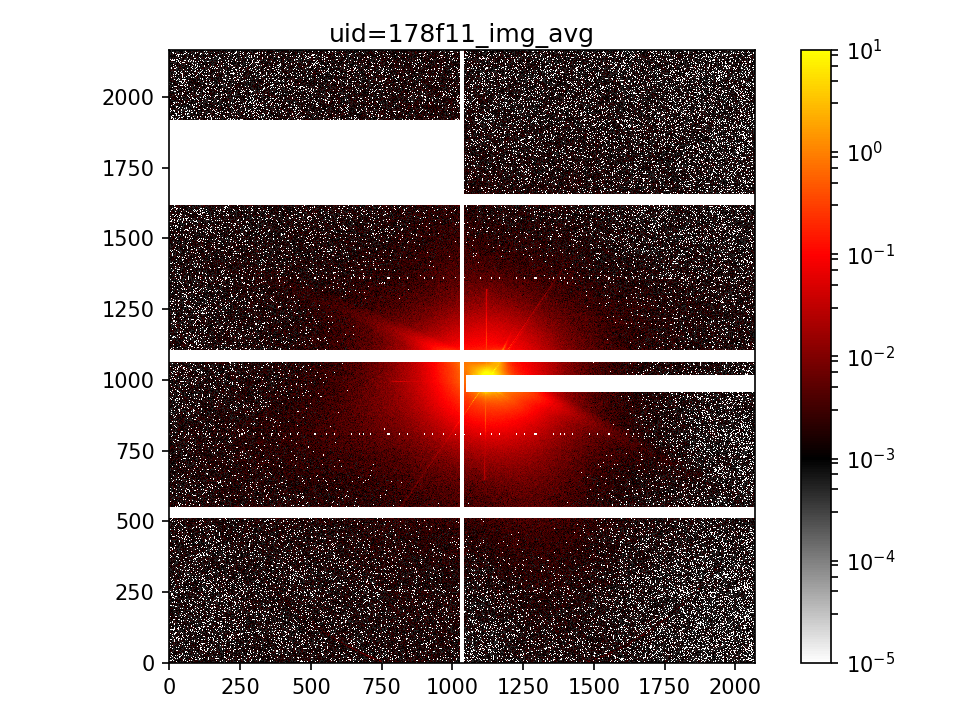

<IPython.core.display.Javascript object>


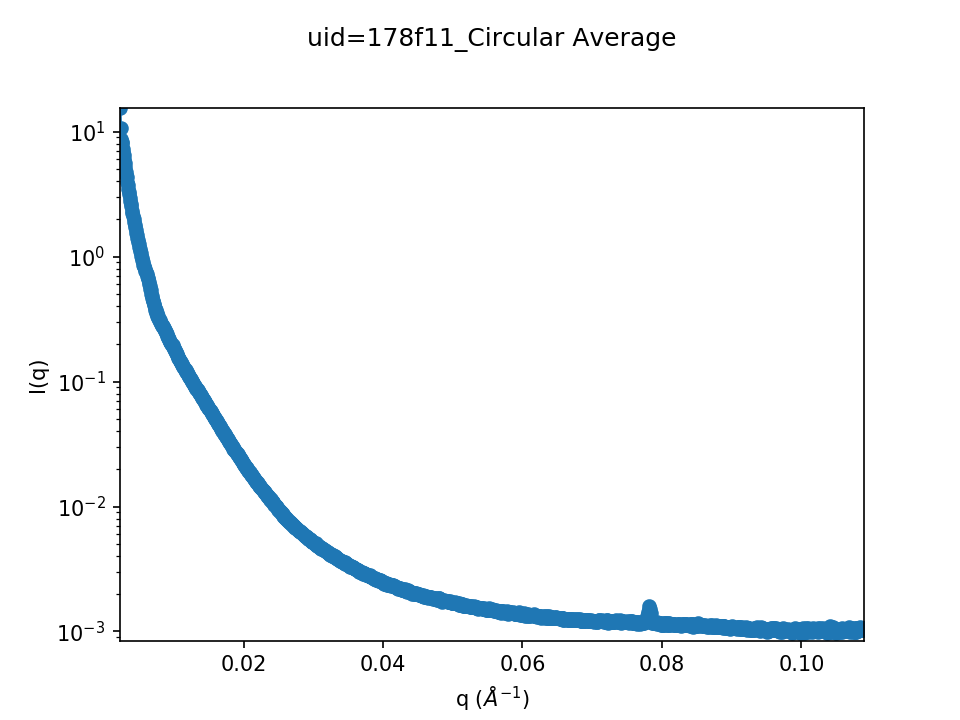

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_e4ada9bc-9b73-4b69-a3e6-c1454d320309.cmp.


<IPython.core.display.Javascript object>


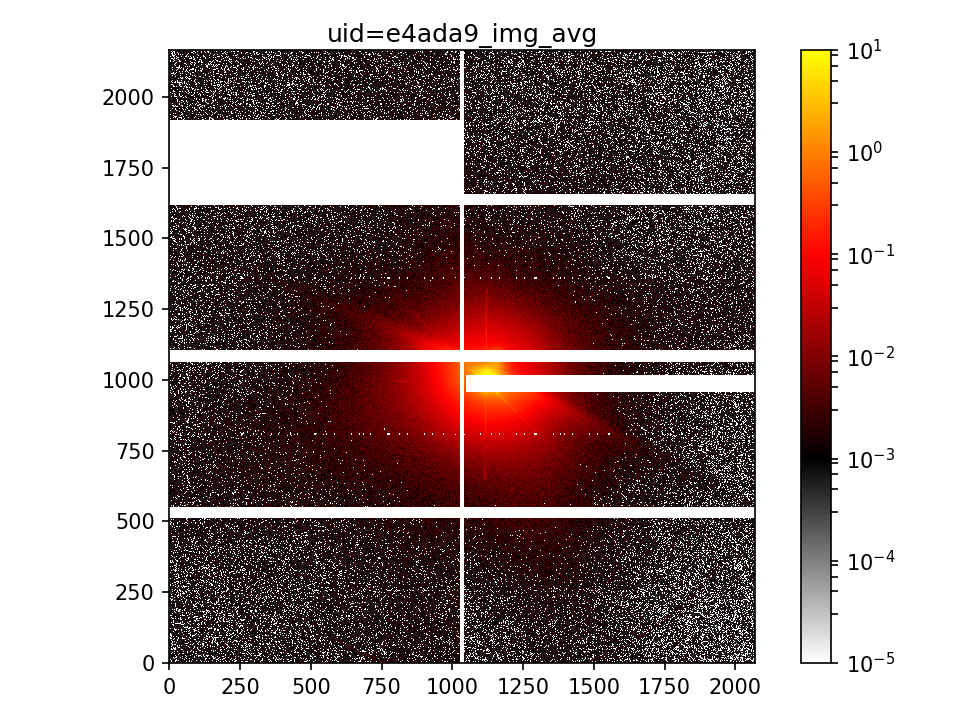

<IPython.core.display.Javascript object>


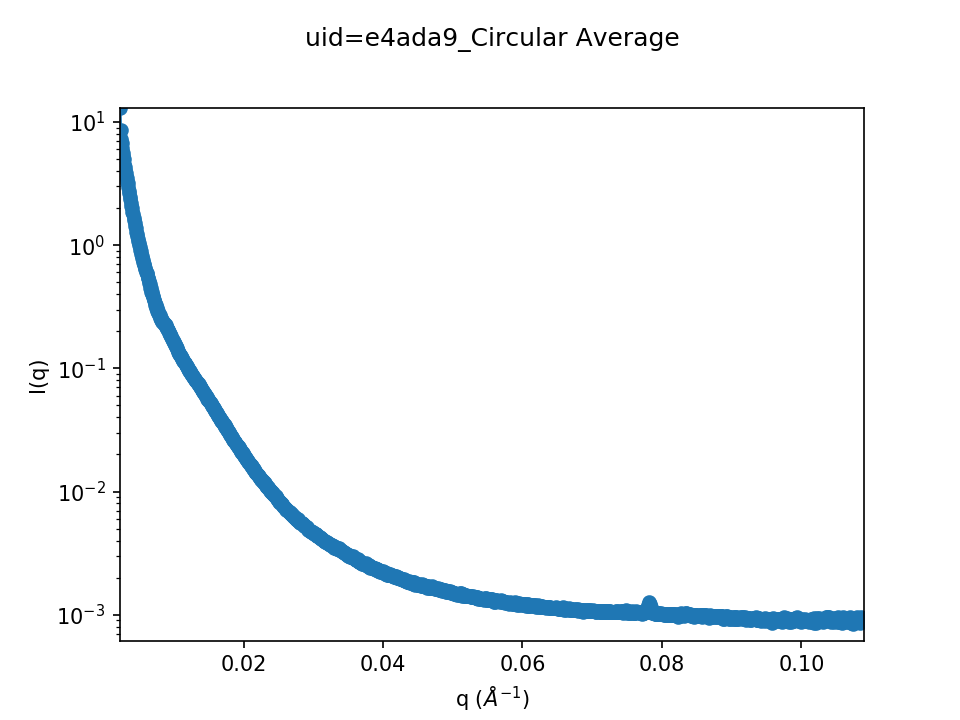

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_398940a8-301a-4abb-b2e7-ed5d409eb574.cmp.


<IPython.core.display.Javascript object>


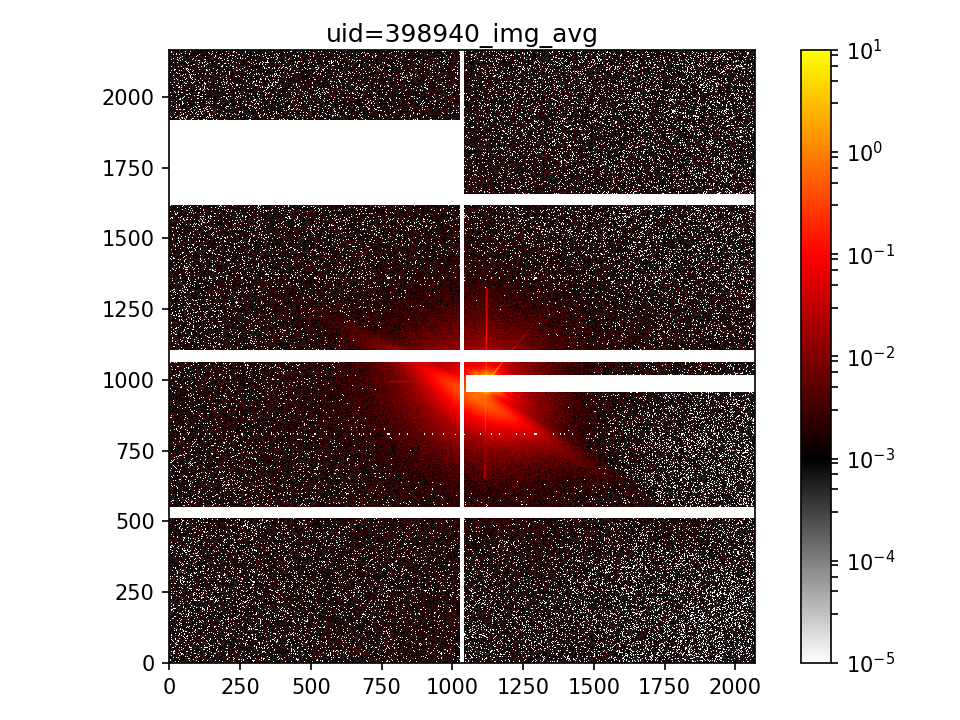

<IPython.core.display.Javascript object>


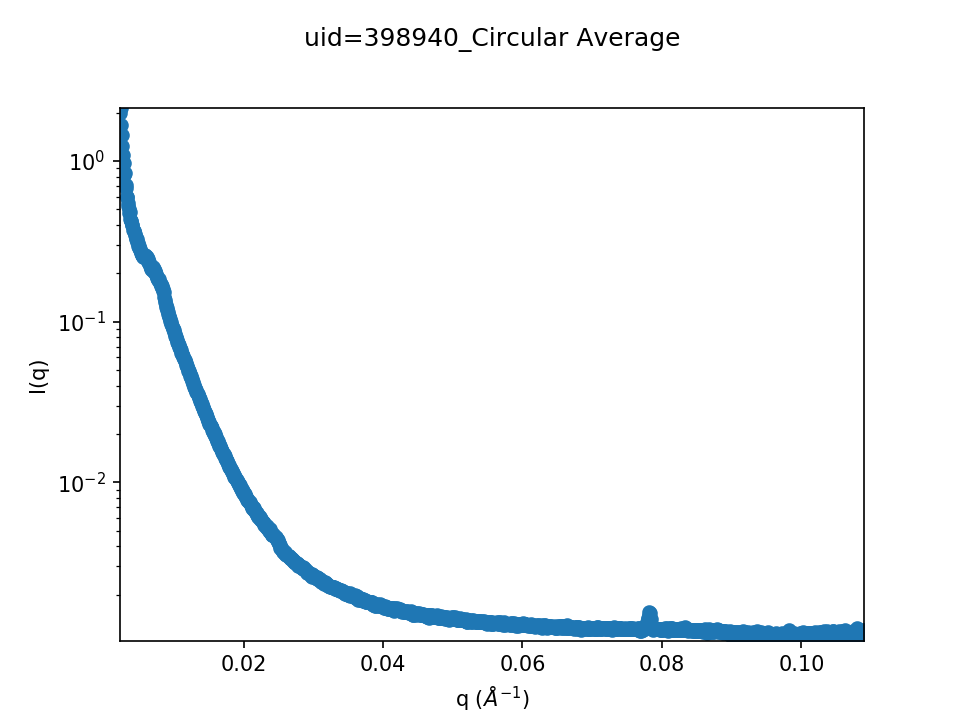

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_74850141-0c99-4bbe-a5ea-797238a12ee1.cmp.


<IPython.core.display.Javascript object>


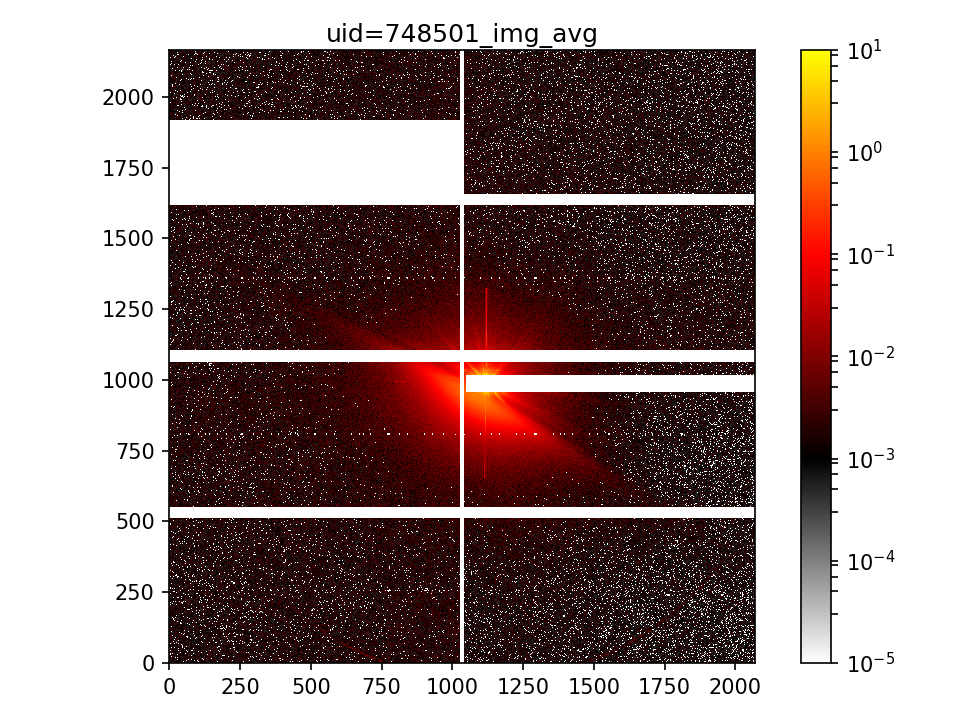

<IPython.core.display.Javascript object>


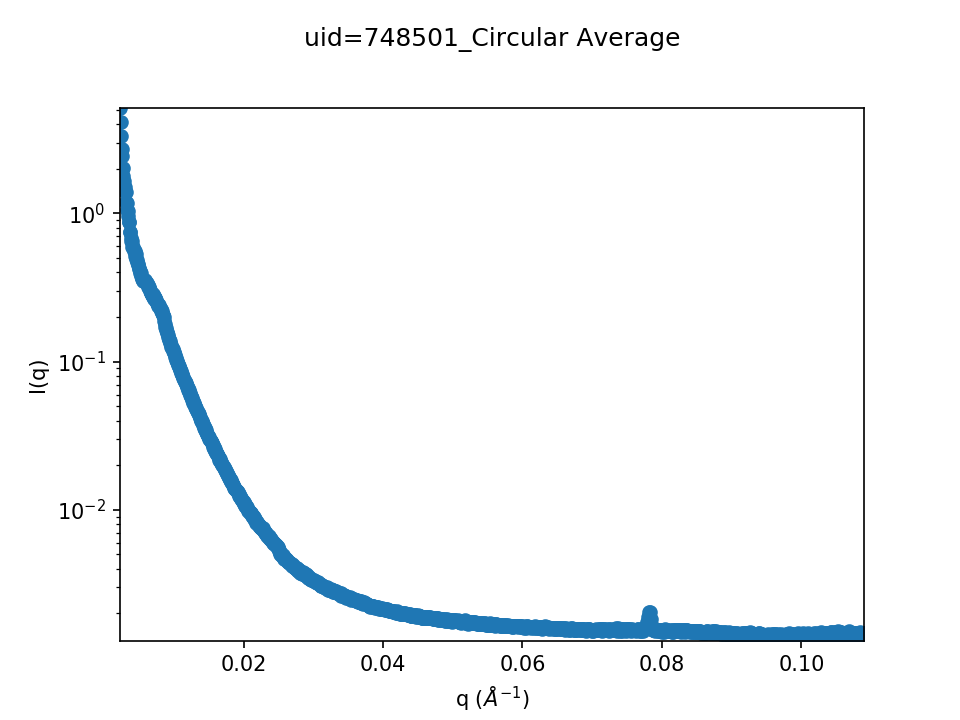

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_1afc83df-8068-4a4e-8a0f-0cf2a42d6c46.cmp.


<IPython.core.display.Javascript object>


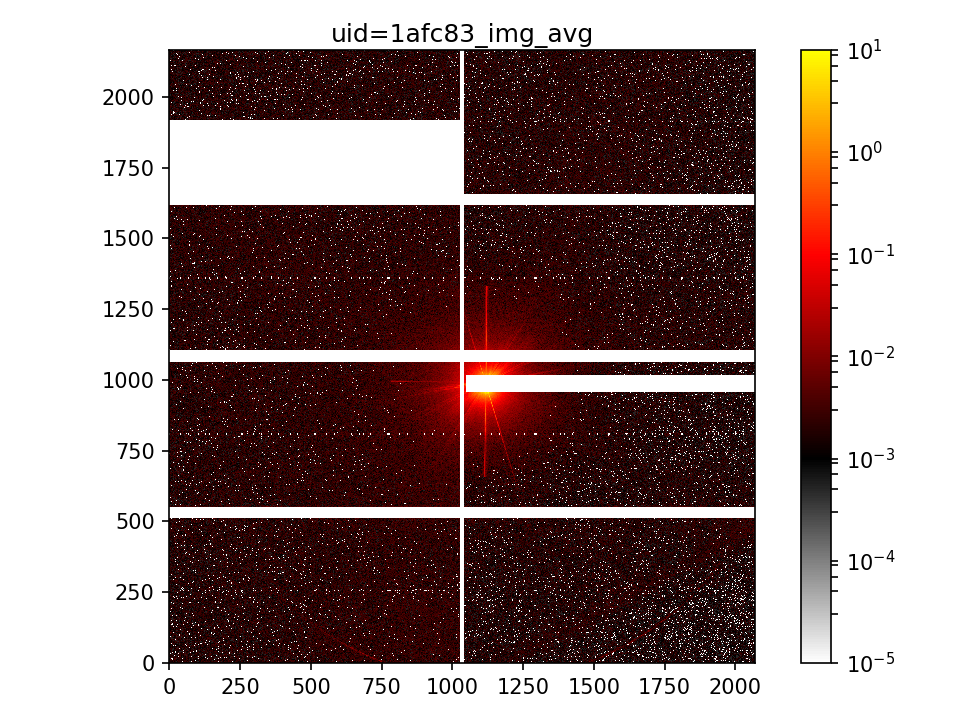

<IPython.core.display.Javascript object>


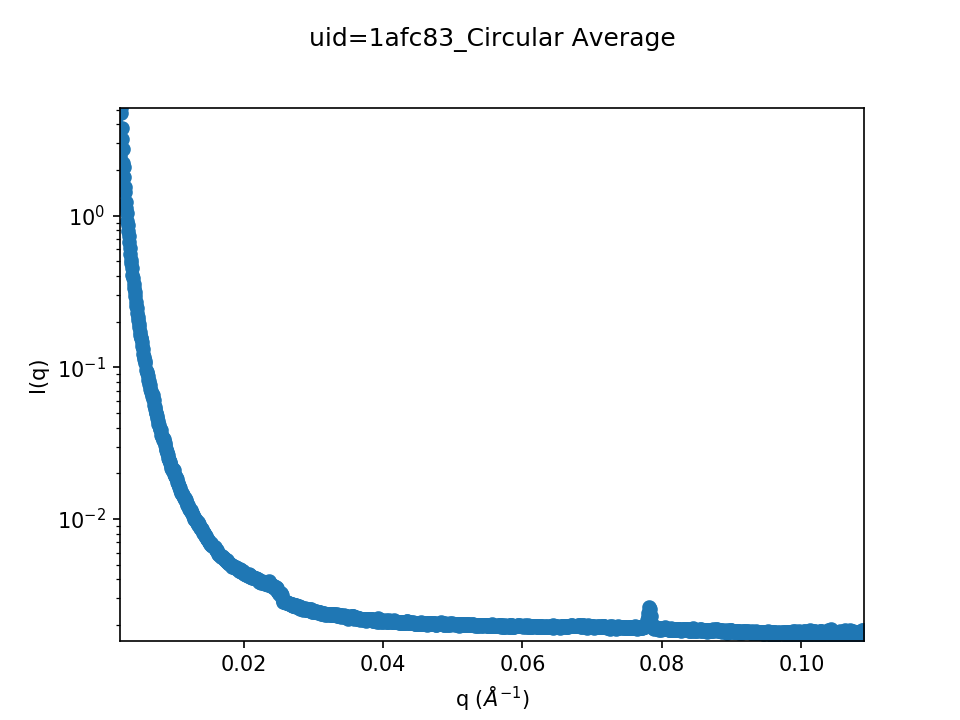

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_1393d28e-045c-4155-893a-e31664936302.cmp.


<IPython.core.display.Javascript object>


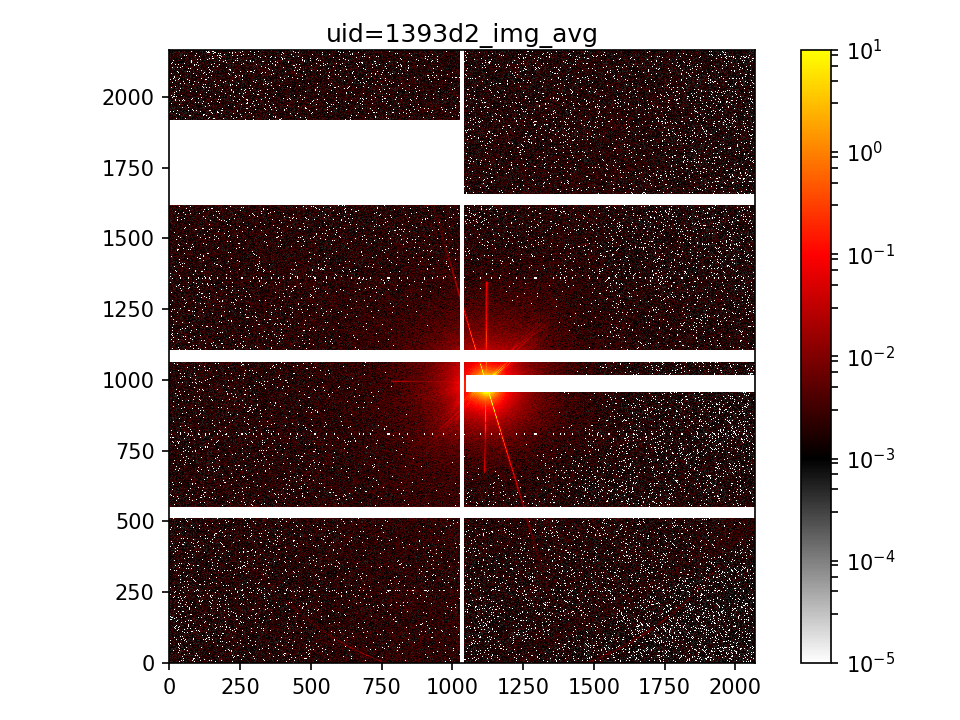

<IPython.core.display.Javascript object>


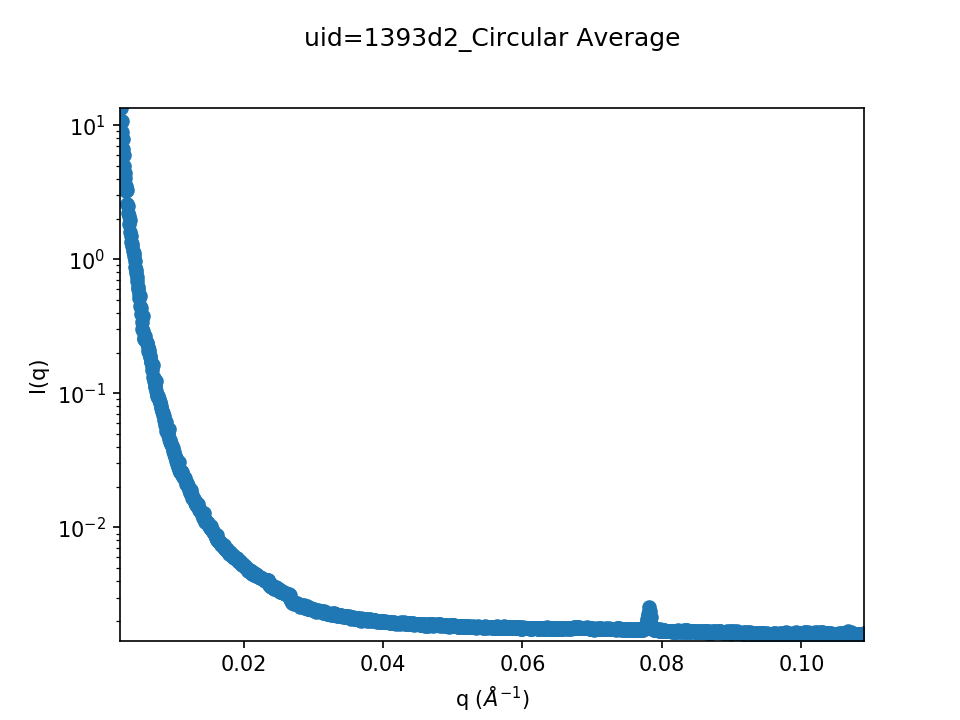

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_48e9662d-e470-4a9e-bcc9-eefec3714dfb.cmp.


<IPython.core.display.Javascript object>


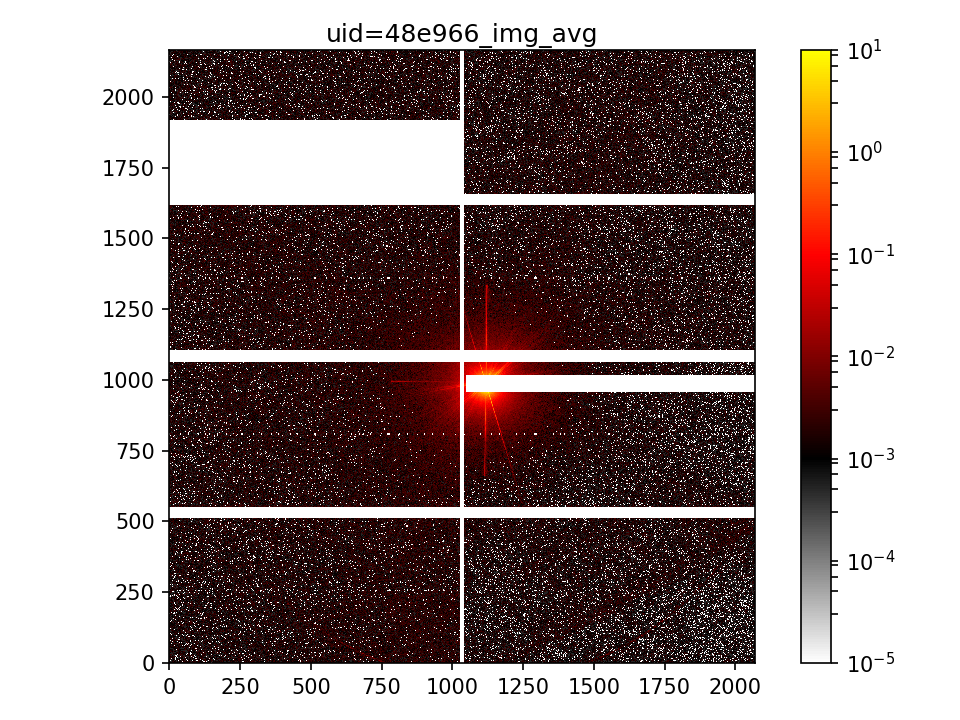

<IPython.core.display.Javascript object>


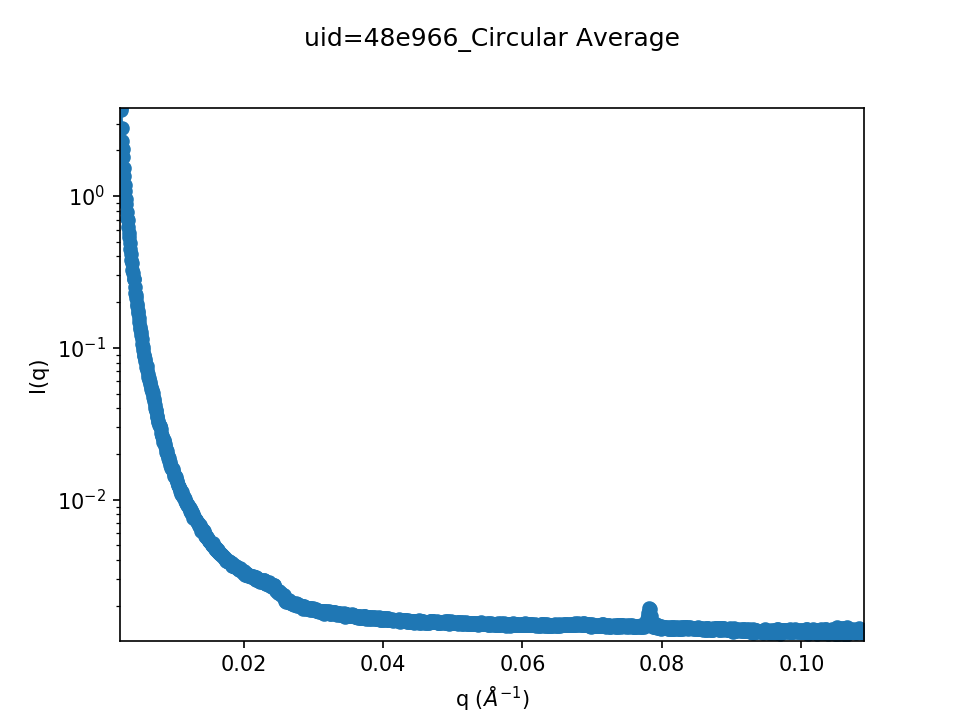

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_29396191-a9a1-401f-a439-bc697253d74d.cmp.


<IPython.core.display.Javascript object>


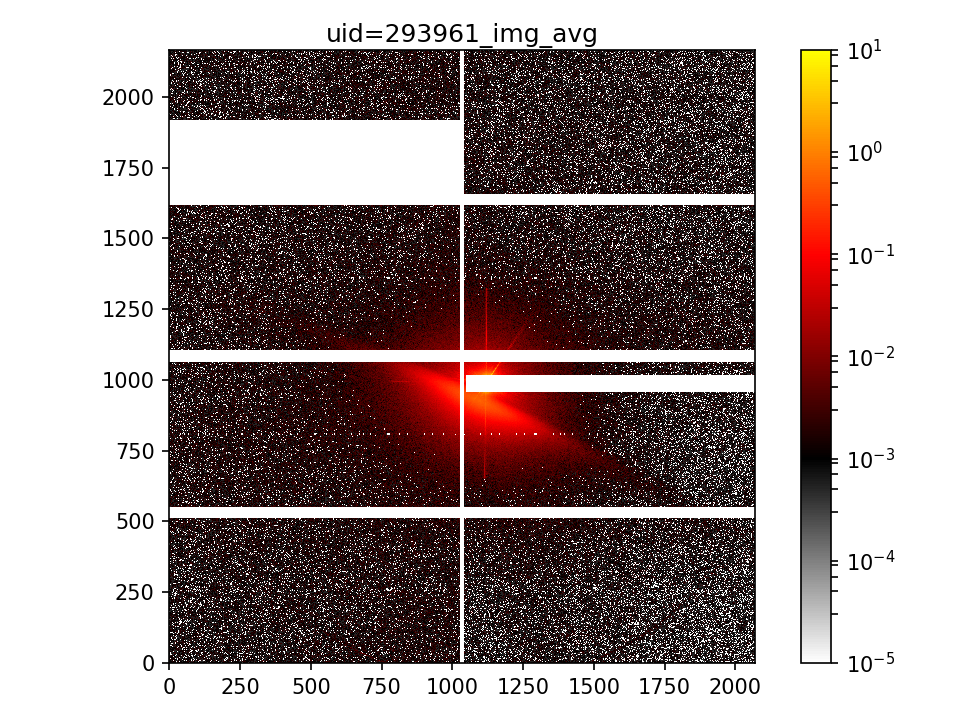

<IPython.core.display.Javascript object>


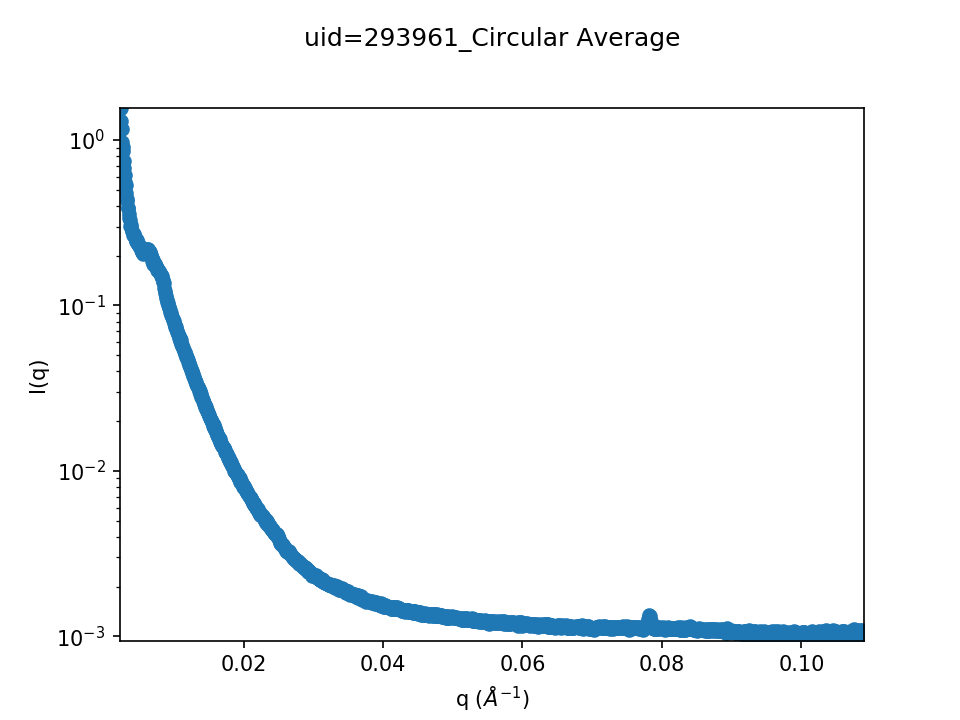

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_af5b4ac1-ecef-41be-a820-67983f050b9d.cmp.


<IPython.core.display.Javascript object>


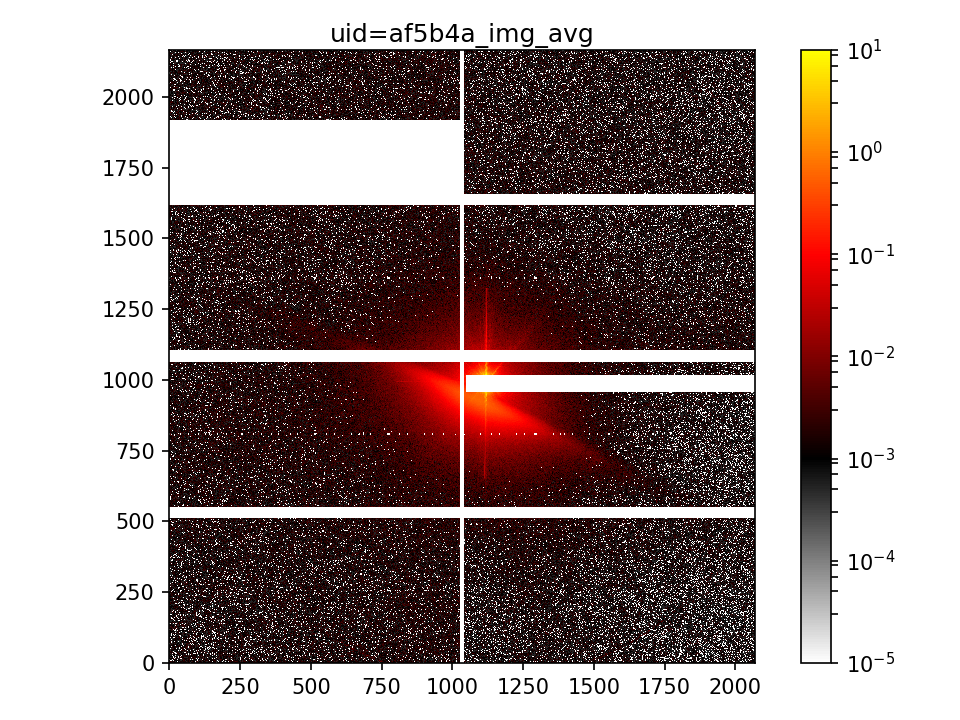

<IPython.core.display.Javascript object>


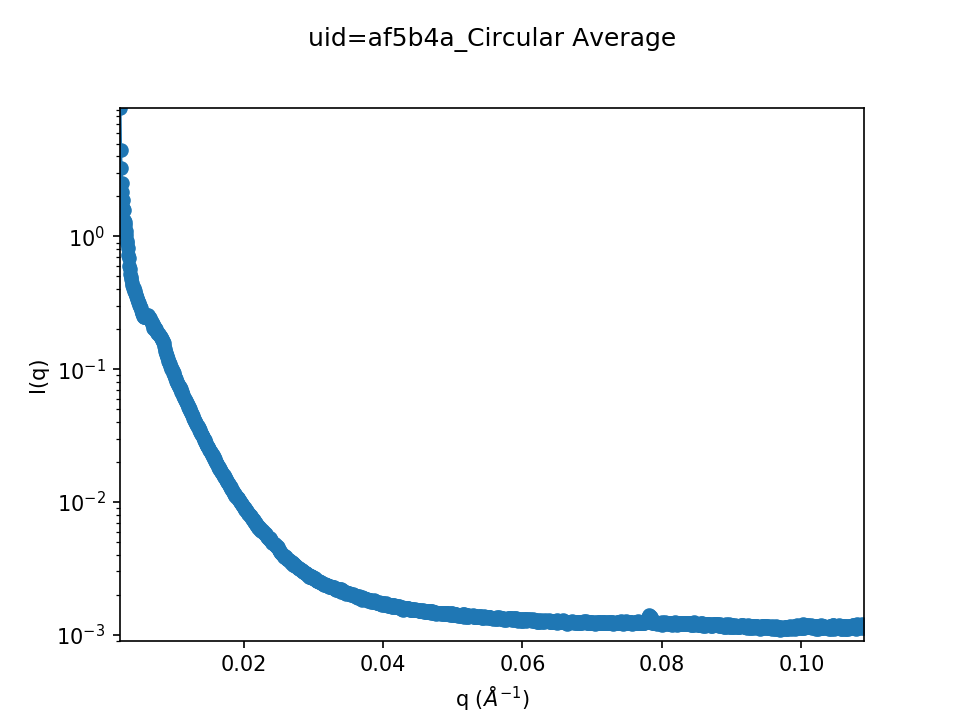

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_171cf5dd-2cb1-4ef8-a004-8f3f383ec1ea.cmp.


<IPython.core.display.Javascript object>


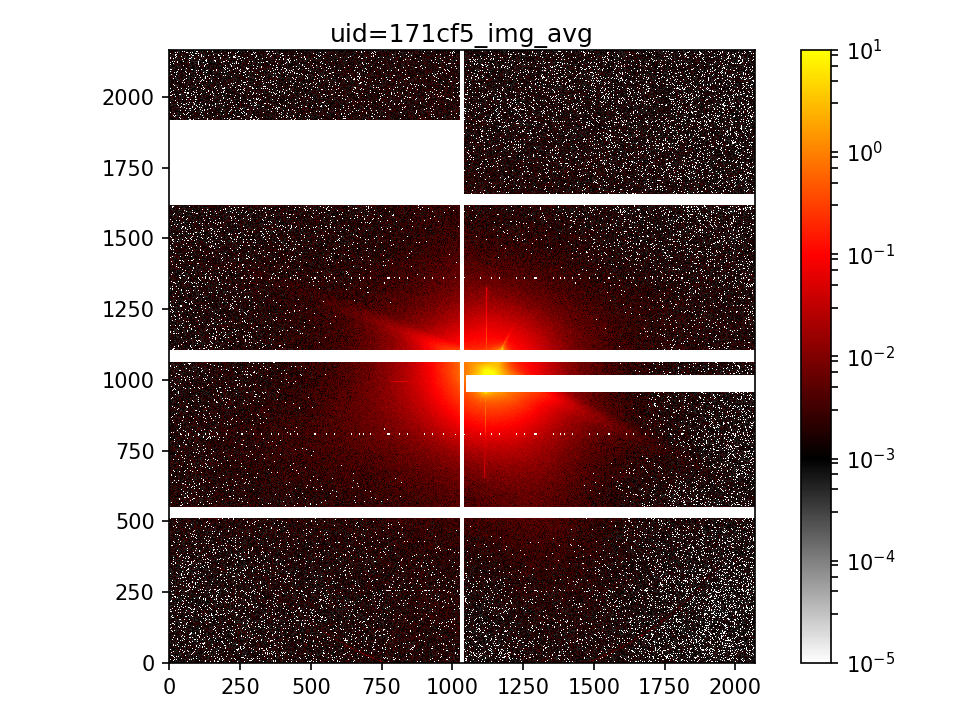

<IPython.core.display.Javascript object>


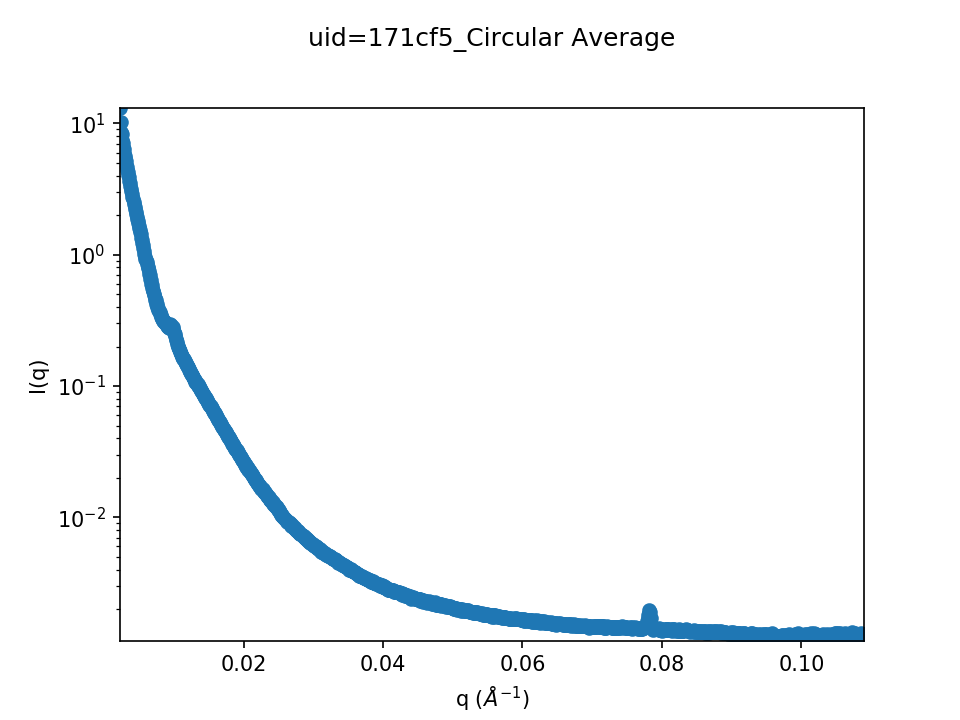

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_9b08ff72-e448-42a0-ad45-aef976e80db1.cmp.


<IPython.core.display.Javascript object>


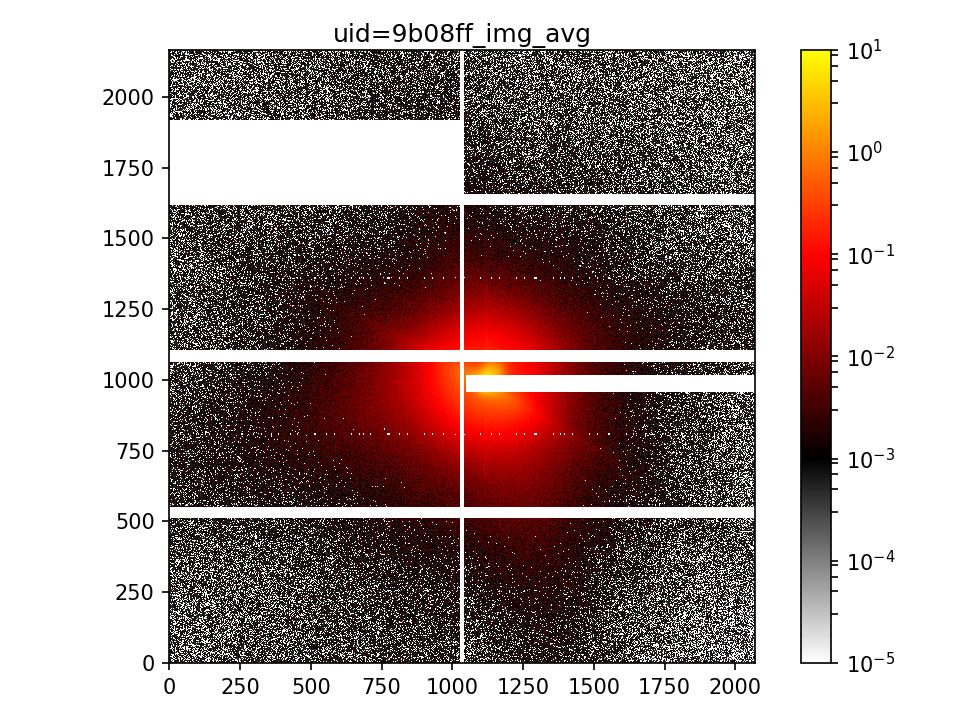

<IPython.core.display.Javascript object>


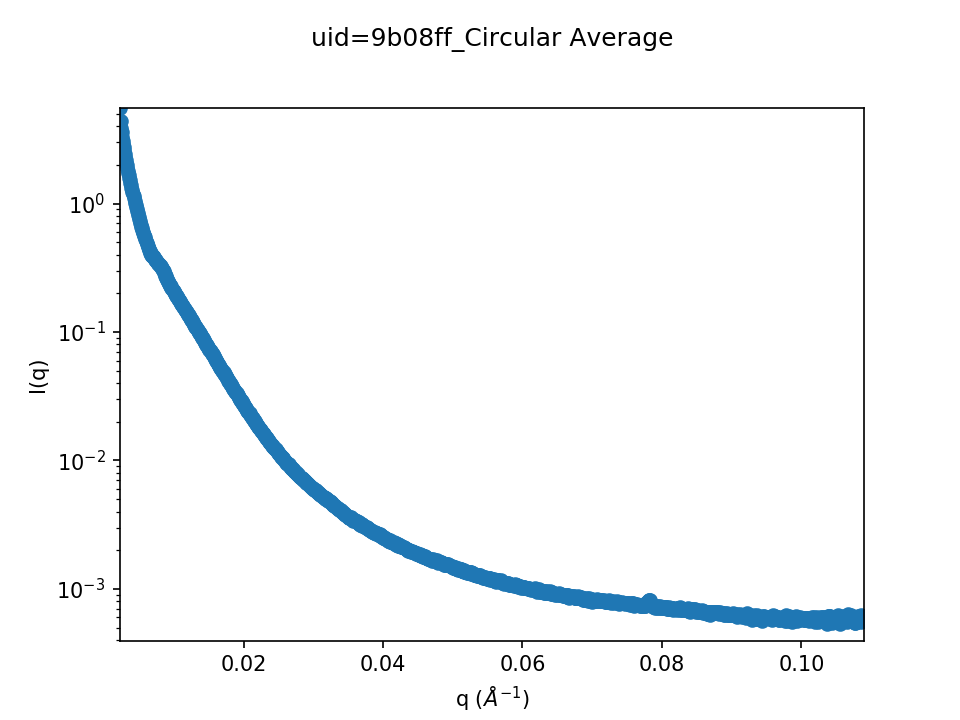

Using already created compressed file with filename as :/XF11ID/analysis/Compressed_Data/uid_9bea6fcb-693d-4e86-899b-4903dc15f3b0.cmp.


<IPython.core.display.Javascript object>


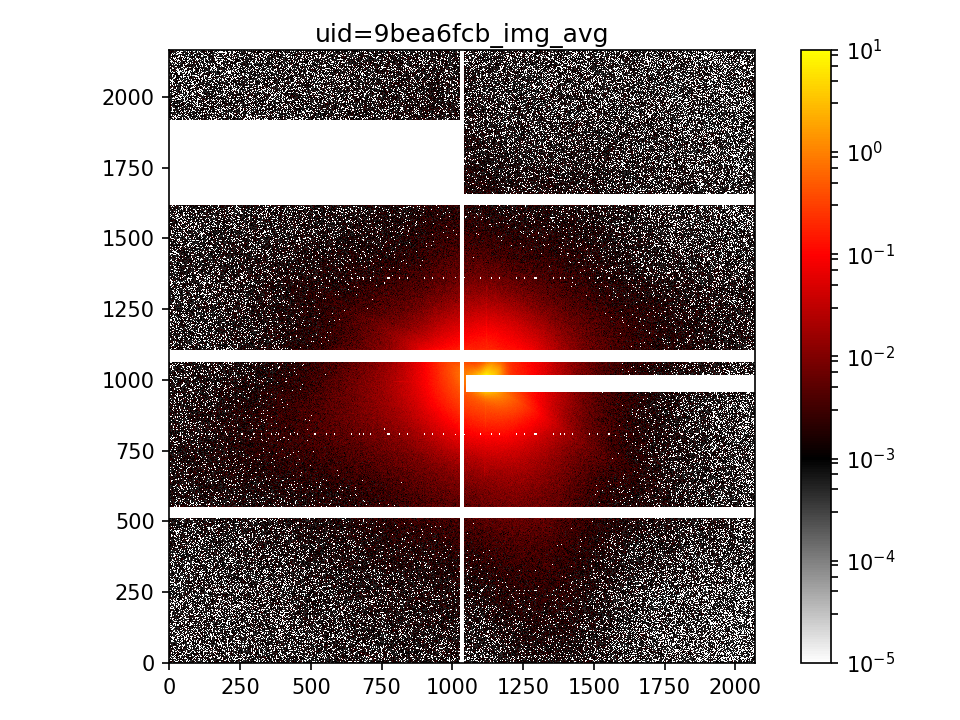

<IPython.core.display.Javascript object>


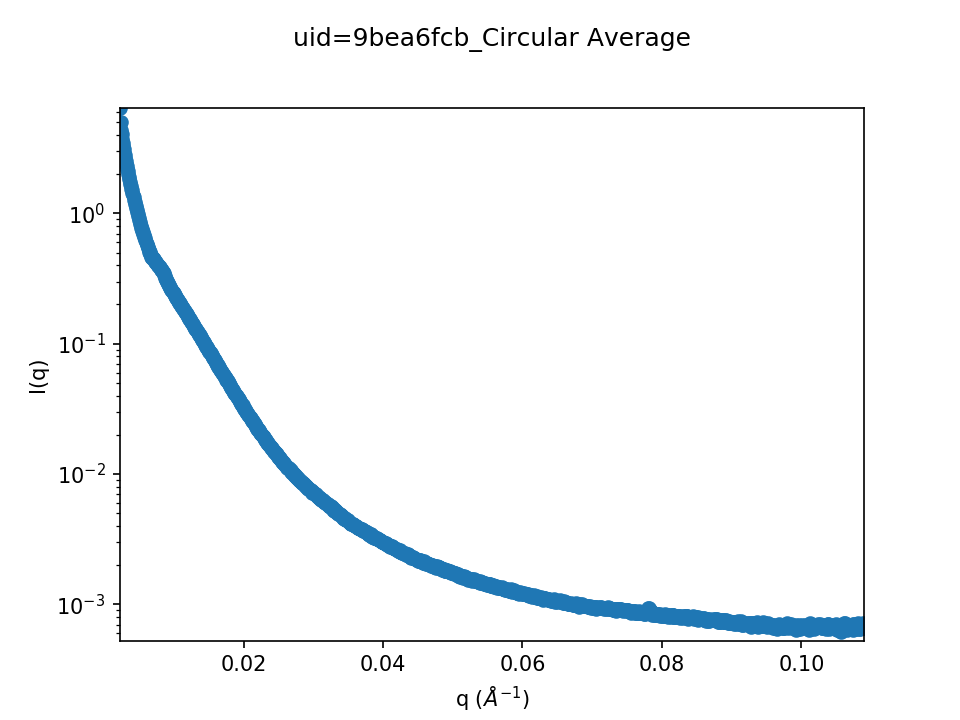

The file: qIq_Pressure_July16_2017.csv is saved in /XF11ID/analysis/2017_2/yuzhang/Results/Yang_Pressure/


In [108]:
pd = get_iq_from_uids(  uids, mask, setup_pargs )

In [109]:
pd

q  p=3.30_178f11  p=3.30_e4ada9  p=6.27_398940  p=6.27_748501  \
0     0.002275      15.455789      12.975201       1.993653       5.142322   
1     0.002350      10.714612       8.670416       2.140388       4.118310   
2     0.002425       8.759825       7.315244       1.688148       3.329016   
3     0.002499       8.201193       6.752368       1.448351       2.716263   
4     0.002574       8.166600       6.095270       1.241743       2.429587   
5     0.002648       7.321115       5.616946       1.095457       2.038837   
6     0.002723       6.856778       5.320901       0.977076       1.782269   
7     0.002798       6.540526       4.985439       0.968567       1.661164   
8     0.002872       6.027218       4.553543       0.824883       1.541565   
9     0.002947       5.658698       4.328135       0.837405       1.518749   
10    0.003021       5.216523       4.069986       0.710517       1.408539   
11    0.003096       4.765397       3.851896       0.707757       1.395050   
12    0.003171       4.466400       3.581631       0.684326       1.200530   
13    0.003245       4.303263       3.518200       0.601596       1.175137   
14    0.003320       3.975903       3.237038       0.601437       1.058947   
15    0.003394       3.744667       3.195789       0.546663       1.031045   
16    0.003469       3.482048       2.972216       0.528326       0.966192   
17    0.003544       3.265303       2.763454       0.505234       0.874263   
18    0.003618       3.168759       2.669857       0.474743       0.870400   
19    0.003693       2.943846       2.458882       0.478809       0.749205   
20    0.003767       2.761982       2.367554       0.435760       0.744358   
21    0.003842       2.623355       2.188547       0.424838       0.679189   
22    0.003917       2.549510       2.074258       0.425924       0.647080   
23    0.003991       2.324518       2.005887       0.399388       0.648363   
24    0.004066       2.232449       1.858361       0.402870       0.595424   
25    0.004140       2.105107       1.787654       0.371173       0.596050   
26    0.004215       2.012967       1.662500       0.366660       0.568533   
27    0.004290       1.905145       1.589759       0.365586       0.560697   
28    0.004364       1.802551       1.506552       0.351711       0.557904   
29    0.004439       1.710910       1.418343       0.349100       0.519514   
...        ...            ...            ...            ...            ...   
1564  0.118928       0.001202       0.001018       0.001298       0.001553   
1565  0.119003       0.001145       0.000886       0.001191       0.001496   
1566  0.119077       0.001044       0.001061       0.001272       0.001333   
1567  0.119152       0.001281       0.000993       0.001082       0.001579   
1568  0.119226       0.000947       0.000880       0.001340       0.001560   
1569  0.119301       0.001168       0.000789       0.001263       0.001663   
1570  0.119376       0.001153       0.000806       0.001198       0.001523   
1571  0.119450       0.001085       0.000977       0.001310       0.001504   
1572  0.119525       0.001028       0.000881       0.001408       0.001493   
1573  0.119599       0.000936       0.000947       0.001076       0.001485   
1574  0.119674       0.001066       0.000947       0.001105       0.001395   
1575  0.119748       0.000996       0.000768       0.001209       0.001863   
1576  0.119823       0.001342       0.000921       0.001316       0.001684   
1577  0.119897       0.001070       0.001002       0.001273       0.001324   
1578  0.119972       0.001068       0.001023       0.001414       0.001654   
1579  0.120047       0.001053       0.000877       0.001368       0.001614   
1580  0.120121       0.001111       0.000975       0.001033       0.001579   
1581  0.120196       0.001316       0.001165       0.001297       0.001711   
1582  0.120270       0.000842       0.001011       0.001221       0.001663   
1583  0.120345       0.001003      